<a href="https://colab.research.google.com/github/zzerross/ai/blob/main/rnn/sin/RNNSinSequence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tensorflow import keras
from tensorflow.keras import datasets, layers, models, optimizers

mpl.rcParams['lines.markersize'] = 0.5
mpl.rcParams['lines.linewidth'] = 0.2
# mpl.rcParams['lines.linestyle'] = '-.'

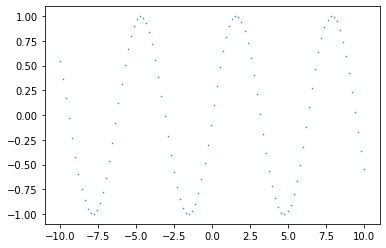

In [115]:
# pi/2 * 1 = 90
# pi/2 * 2 = 180
# pi/2 * 3 = 270
# pi/2 * 4 = 360
radians = np.linspace(-10, 10, 100)
data = np.sin(radians)
plt.scatter(radians, data)

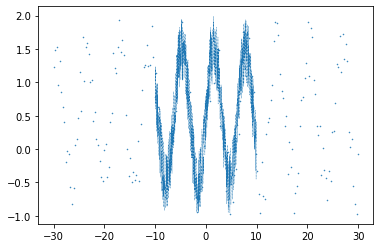

In [160]:
def get_input(start, end, num, timesteps):
  radians = np.linspace(start, end, num)
  sin = np.sin(radians) + np.random.random(num)
  return radians, sin

hidden_units = 32
timesteps = 20
input_dim = 1

start = -10
end = 10
num = 1000
train_x, train_y = get_input(start, end, int(num * 0.8), timesteps)
test_x, test_y = get_input(start * 3, end * 3, int(num * 0.2), timesteps)

plt.plot(train_x, train_y)
plt.scatter(test_x, test_y)

In [161]:
def make_sequence(input, timesteps):
  return np.array(list(map(lambda x: input[x:x+timesteps], range(len(input) - timesteps))))

def test_sequence(n=3):
  a = [0, 1, 2, 3, 4, 5, 6]
  print(make_sequence(a, n))
  print(a[n:])
test_sequence()

train_seq_x = make_sequence(train_x, timesteps)
train_seq_y = train_x[timesteps:]
test_seq_x = make_sequence(test_x, timesteps)
test_seq_y = test_x[timesteps:]

test_seq_x.shape, test_seq_y.shape

[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]]
[3, 4, 5, 6]


((180, 20), (180,))

In [191]:
def make_sequence(input, timesteps):
  x = list(map(lambda x: input[x:x+timesteps], range(len(input) - timesteps)))
  y = input[timesteps:]
  return np.reshape(x, (-1, timesteps, input_dim)), np.reshape(y, (-1, input_dim))

def test_sequence(n=3):
  print(make_sequence([0, 1, 2, 3, 4, 5, 6], n))
test_sequence()

train_seq_x, train_seq_y = make_sequence(train_x, timesteps)
test_seq_x, test_seq_y = make_sequence(test_x, timesteps)

test_seq_x.shape, test_seq_y.shape

(array([[[0],
        [1],
        [2]],

       [[1],
        [2],
        [3]],

       [[2],
        [3],
        [4]],

       [[3],
        [4],
        [5]]]), array([[3],
       [4],
       [5],
       [6]]))


((180, 20, 1), (180, 1))

In [192]:
model = models.Sequential()
model.add(layers.Input(batch_shape=(None, timesteps, input_dim)))
model.add(layers.LSTM(hidden_units))
model.add(layers.Dense(1))
model.compile(optimizers.Adam(0.01), loss='mse')
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 32)                4352      
                                                                 
 dense_19 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [193]:
epochs = 100
history = model.fit(train_seq_x, train_seq_y, epochs=epochs, batch_size=100, shuffle=True, verbose=0)

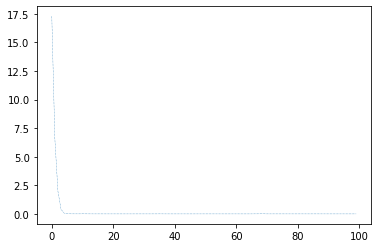

In [194]:
plt.plot(history.history['loss'])
plt.show()

In [195]:
test_loss = model.evaluate(test_seq_x, test_seq_y)

6/6 [==============================] - 0s 4ms/step - loss: 72.0884


(780, 20, 1) (180, 20, 1)


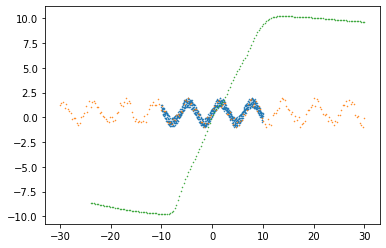

In [198]:
plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y)

predicted_y = model.predict(test_seq_x)
plt.scatter(test_x[timesteps:], predicted_y)

print(train_seq_x.shape, test_seq_x.shape)